In [147]:
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
from fbprophet import Prophet
import numpy as np

In [223]:
df = pd.read_excel("Compra.xlsx", index=True)

In [224]:
df

,Serial,NID,Nombre,Codigo,Gravamen,Fecha Recepcion,Fecha Promesa,Fecha Escritura Esperada,Fecha Escritura Tentativa,Fecha Escritura Real,...,Precio Compra,Fecha Escritura Esperada + Solicitud Cliente,Tramitadora,Comercial Compra,Folio de Matrícula,Ciudad,Tipo de Inmueble,Codigo Fiduciaria,Tipo de Financiación,Tipo de Concepto
0,1,1607562423,Capriani 2,AE,NaN,2019-11-18,2019-11-25,2019-11-25,2019-11-25,2019-11-25,...,184000000,2019-11-25,Joel,Edwin Alejo,50N-20711672,Bogotá,NaN,NaN,Habi,NaN
1,2,1607874433,Torre Imperial,AA,Libre de Gravámenes ó Afectación familiar,2019-11-18,2019-11-25,2019-11-25,2019-11-25,2019-11-25,...,230000000,2019-11-25,Joel,Edwin Alejo,50N-20837207,Bogotá,Simple,NaN,Habi,NaN
2,3,1607297586,Santa Maria de Suba,AA,Libre de Gravámenes ó Afectación familiar,2020-01-21,2020-01-21,2020-01-27,2020-01-27,2020-01-27,...,132000000,2020-01-27,Carolina Castro,Edwing Pineda,50N-20653863,Bogotá,Simple,NaN,PA + Dann,NaN
3,4,1607595569,Prados de Suba,AA,Libre de Gravámenes ó Afectación familiar,2020-02-07,2020-02-21,2020-03-10,2020-03-10,2020-03-10,...,123000000,2020-03-10,Karen Rojas,Juan Pablo Zapata,50N-20467945,Bogotá,Simple,NaN,PA + Dann,NaN
4,5,1608049130,Mirador de Suba,AI,Embargo,2020-02-25,2020-02-26,2020-04-10,2020-10-28,2020-10-30,...,113700000,2020-04-10,Carolina Castro,Edwing Pineda,50N-20337505,Bogotá,Complejo,NaN,Habi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,202,3724910677,Versalles reservado,AF,Hipoteca ó Hipoteca + Afectación Familiar,2021-01-08,2021-01-12,2021-03-15,2021-03-15,NaT,...,328200000,2021-03-15,Pilar Bernal,Diana Hernandez,50N-20512449,bogotá,Simple,NaN,NaN,NaN
202,203,2982539679,Tayrona Manzana D,AE,Patrimonio hijos,2021-01-08,2021-01-12,2021-02-16,2021-02-16,NaT,...,96150000,2021-02-16,Carolina Castro,Manuel Colunga,50S-40485351,bogotá,Complejo,NaN,NaN,NaN
203,204,3450986096,Colinas de Athenas II,AA,Libre gravamen,2021-01-08,2021-01-13,2021-02-01,2021-02-01,NaT,...,270000000,2021-02-01,Deisy Castro,Juan Pablo Zapata,50N-20061686,bogotá,Simple,NaN,NaN,NaN
204,205,3598915305,Conjunto residencial el Manantial,AG,Hipoteca + Patrimonio,2021-01-12,2021-01-13,2021-02-03,2021-02-03,NaT,...,185000000,2021-02-03,Pilar Bernal,Julio Rodriguez,50C-1790435,bogotá,Simple,NaN,NaN,NaN


In [225]:
df = df.groupby('Fecha Escritura Real').agg({'Serial':pd.Series.count}).reset_index()


In [226]:
df.dtypes

Fecha Escritura Real    datetime64[ns]
Serial                           int64
dtype: object

In [206]:
idx = pd.date_range(np.min(df['Fecha Escritura Real']), np.max(df['Fecha Escritura Real']))
df.set_index('Fecha Escritura Real', inplace = True)
df =  df.reindex(idx, fill_value=0)
df.reset_index(inplace = True)
df.rename(columns = {'index':'Fecha Escritura Real'}, inplace = True)
df

,index,Serial
0,2019-11-25,2
1,2019-11-26,0
2,2019-11-27,0
3,2019-11-28,0
4,2019-11-29,0
...,...,...
413,2021-01-11,0
414,2021-01-12,0
415,2021-01-13,0
416,2021-01-14,3


In [227]:
m1 = Prophet(weekly_seasonality=True, daily_seasonality=True,yearly_seasonality=False) #seasonality_mode='multiplicative',mcmc_samples=10)
m1.add_country_holidays(country_name='CO')

In [228]:
m1.fit(df[['Fecha Escritura Real', 'Serial']].rename(columns={"Fecha Escritura Real": "ds", 'Serial': "y"}))

In [229]:
future1 = m1.make_future_dataframe(periods=6, freq='D')

In [230]:
forecast1 = m1.predict(future1)

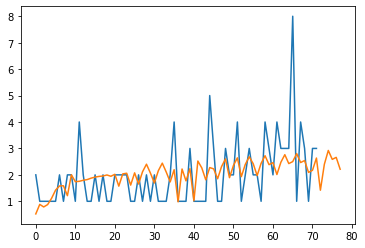

In [231]:
m1.train_holiday_names

plt.plot(df['Serial'])
plt.plot(forecast1['yhat'])
plt.show()

In [232]:
df['week'] = df['Fecha Escritura Real'].map(lambda x: str(str(x.isocalendar()[0])+' '+str(x.isocalendar()[1])+ ' 1'))
df['week'] = df['week'].map(lambda x: datetime.strptime(x, '%G %V %u'))
df_week = df.groupby(['week']).agg({'Serial':np.sum}).reset_index()
df_week

,week,Serial
0,2019-11-25,2
1,2020-01-27,1
2,2020-03-09,2
3,2020-04-20,1
4,2020-06-15,1
5,2020-07-13,2
6,2020-07-27,3
7,2020-08-10,7
8,2020-08-17,2
9,2020-08-24,1


In [233]:
m1 = Prophet(weekly_seasonality=True, daily_seasonality=True,yearly_seasonality=False) #seasonality_mode='multiplicative',mcmc_samples=10)
m1.add_country_holidays(country_name='CO')

In [234]:
m1.fit(df_week[['week', 'Serial']].rename(columns={"week": "ds", 'Serial': "y"}))

INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


In [235]:
future1 = m1.make_future_dataframe(periods=4, freq='W')

In [236]:
forecast1 = m1.predict(future1)

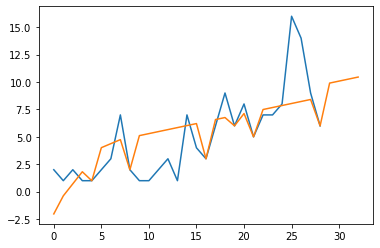

In [237]:
m1.train_holiday_names

plt.plot(df_week['Serial'])
plt.plot(forecast1['yhat'])
plt.show()

In [238]:
df_week['wmape'] = np.sum((df_week['Serial'] - forecast1['yhat']).abs()) / np.sum(df['Serial'])

In [239]:
df_week["wmape"].mean()

0.3825021452846082

In [222]:
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ascensión del señor [Ascension of Jesus](Observed),Ascensión del señor [Ascension of Jesus](Observed)_lower,Ascensión del señor [Ascension of Jesus](Observed)_upper,Año Nuevo [New Year's Day],...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-11-25,-0.064626,-4.961379,1.324492,-0.064626,-0.064626,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-0.774172,-0.774172,-0.774172,0.0,0.0,0.0,-1.871027
1,2019-12-02,0.091038,-4.801769,1.612251,0.091038,0.091038,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-0.774172,-0.774172,-0.774172,0.0,0.0,0.0,-1.715363
2,2019-12-09,0.246702,-4.712540,1.714742,0.246702,0.246702,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-0.774172,-0.774172,-0.774172,0.0,0.0,0.0,-1.559698
3,2019-12-16,0.402366,-4.623200,1.552120,0.402366,0.402366,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-0.774172,-0.774172,-0.774172,0.0,0.0,0.0,-1.404034
4,2019-12-23,0.558031,-4.327489,1.883507,0.558031,0.558031,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-0.774172,-0.774172,-0.774172,0.0,0.0,0.0,-1.248370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2021-01-11,9.122629,2.816575,9.020327,9.122629,9.122629,0.0,0.0,0.0,0.0,...,-1.312771,-1.312771,-1.312771,-0.774172,-0.774172,-0.774172,0.0,0.0,0.0,6.003458
60,2021-01-17,9.256146,5.175436,11.779793,9.256146,9.256147,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.129029,0.129029,0.129029,0.0,0.0,0.0,8.352946
61,2021-01-24,9.411917,5.354712,11.423099,9.411912,9.411921,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.129029,0.129029,0.129029,0.0,0.0,0.0,8.508717
62,2021-01-31,9.567687,5.324212,11.628263,9.567677,9.567697,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.129029,0.129029,0.129029,0.0,0.0,0.0,8.664487


In [240]:
idx = pd.date_range(np.min(df['Fecha Escritura Real']), np.max(df['Fecha Escritura Real']))
df.set_index('Fecha Escritura Real', inplace = True)
df =  df.reindex(idx, fill_value=0)
df.reset_index(inplace = True)
df.rename(columns = {'index':'Fecha Escritura Real'}, inplace = True)
df

,Fecha Escritura Real,Serial,week
0,2019-11-25,2,1574640000000000000
1,2019-11-26,0,0
2,2019-11-27,0,0
3,2019-11-28,0,0
4,2019-11-29,0,0
...,...,...,...
413,2021-01-11,0,0
414,2021-01-12,0,0
415,2021-01-13,0,0
416,2021-01-14,3,1610323200000000000


In [241]:
m1 = Prophet(weekly_seasonality=True, daily_seasonality=True,yearly_seasonality=False) #seasonality_mode='multiplicative',mcmc_samples=10)
m1.add_country_holidays(country_name='CO')

In [242]:
m1.fit(df[['Fecha Escritura Real', 'Serial']].rename(columns={"Fecha Escritura Real": "ds", 'Serial': "y"}))

In [243]:
future1 = m1.make_future_dataframe(periods=6, freq='D')

In [244]:
forecast1 = m1.predict(future1)

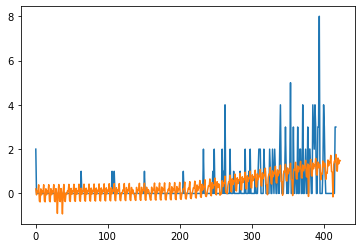

In [245]:
m1.train_holiday_names

plt.plot(df['Serial'])
plt.plot(forecast1['yhat'])
plt.show()

In [246]:
df['week'] = df['Fecha Escritura Real'].map(lambda x: str(str(x.isocalendar()[0])+' '+str(x.isocalendar()[1])+ ' 1'))
df['week'] = df['week'].map(lambda x: datetime.strptime(x, '%G %V %u'))
df_week = df.groupby(['week']).agg({'Serial':np.sum}).reset_index()
df_week

,week,Serial
0,2019-11-25,2
1,2019-12-02,0
2,2019-12-09,0
3,2019-12-16,0
4,2019-12-23,0
5,2019-12-30,0
6,2020-01-06,0
7,2020-01-13,0
8,2020-01-20,0
9,2020-01-27,1


In [247]:
m1 = Prophet(weekly_seasonality=True, daily_seasonality=True,yearly_seasonality=False) #seasonality_mode='multiplicative',mcmc_samples=10)
m1.add_country_holidays(country_name='CO')

In [248]:
m1.fit(df_week[['week', 'Serial']].rename(columns={"week": "ds", 'Serial': "y"}))

In [249]:
future1 = m1.make_future_dataframe(periods=4, freq='W')

In [250]:
forecast1 = m1.predict(future1)

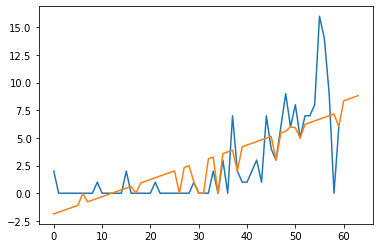

In [251]:
m1.train_holiday_names

plt.plot(df_week['Serial'])
plt.plot(forecast1['yhat'])
plt.show()